In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("y0ussefkandil/bmw-sales2010-2024")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bmw-sales2010-2024' dataset.
Path to dataset files: /kaggle/input/bmw-sales2010-2024


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
print(os.listdir(path))

['BMW sales data (2010-2024).csv']


In [ ]:
df = pd.read_csv(path + "/BMW sales data (2010-2024).csv")
display(df.head())
display(df.info())

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


None

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Convert the target variable
df['Sales_Classification'] = df['Sales_Classification'].apply(lambda x: 1 if x == 'High' else 0)

# 2. Identify categorical and numerical features
categorical_features = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
numerical_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Apply the preprocessing
X = preprocessor.fit_transform(df.drop('Sales_Classification', axis=1))
y = df['Sales_Classification']

# Convert the sparse matrix to a dense array before creating the DataFrame
X_dense = X.toarray()

# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

X_processed = pd.DataFrame(X_dense, columns=all_feature_names)

display(X_processed.head())
display(y.head())

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Model_3 Series,Model_5 Series,Model_7 Series,Model_M3,Model_M5,...,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,-0.234876,0.250548,0.887814,0.911817,1.131530,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.928611,-1.632377,0.368717,0.160951,-0.573911,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.152595,1.241561,-1.541504,1.470514,0.674365,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.615085,-1.533276,-1.260805,-0.540950,-0.357231,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.690105,-1.136871,0.376656,-0.966867,-0.695729,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


,Sales_Classification
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40000, 34)
Shape of X_test: (10000, 34)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


In [ ]:
display(y_train.value_counts())

,count
Sales_Classification,
0,40000


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

In [ ]:

import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# STEP 2: Locate and Load Dataset
csv_files = glob.glob(os.path.join(path, "*.csv"))
csv_file = max(csv_files, key=os.path.getsize)
df = pd.read_csv(csv_file)
print("Loaded file:", csv_file)
print("Shape:", df.shape)
df.head()


Loaded file: /kaggle/input/bmw-sales2010-2024/BMW sales data (2010-2024).csv
Shape: (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
# STEP 3: Basic Cleaning
df = df.drop_duplicates()
df = df.dropna(axis=1, how='all')   # drop empty columns
df = df.dropna()                    # drop missing rows for simplicity
print("After cleaning:", df.shape)


After cleaning: (50000, 11)


In [ ]:
# STEP 4: Select Features and Create Binary Target

# Find a numeric column to represent "Sales" or "Units"
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Choose first numeric column as target (you can change it)
target_col = numeric_cols[0]
print("Target column:", target_col)

# Convert target to binary: 1 = High sales, 0 = Low sales
threshold = df[target_col].median()
df["High_Sales"] = (df[target_col] > threshold).astype(int)

# Drop old target from features
X = df.drop(columns=[target_col, "High_Sales"])
y = df["High_Sales"]


Numeric columns: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
Target column: Year


In [ ]:
# STEP 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (40000, 10) Test size: (10000, 10)


In [ ]:
# STEP 6: Preprocessing (Scaling + Encoding)
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


Accuracy: 0.5329

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.99      0.69      5326
           1       0.51      0.01      0.02      4674

    accuracy                           0.53     10000
   macro avg       0.52      0.50      0.36     10000
weighted avg       0.52      0.53      0.38     10000



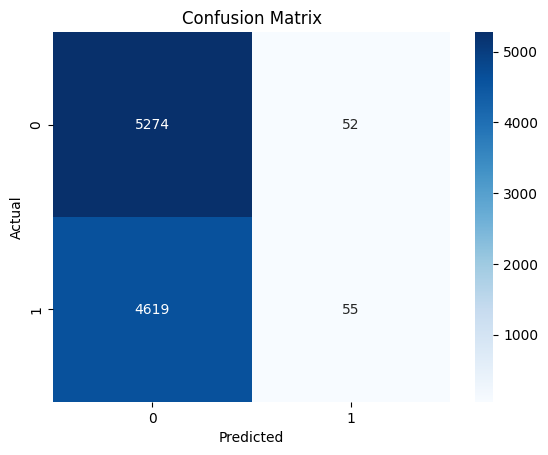

In [ ]:
# STEP 8: Evaluate Model
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


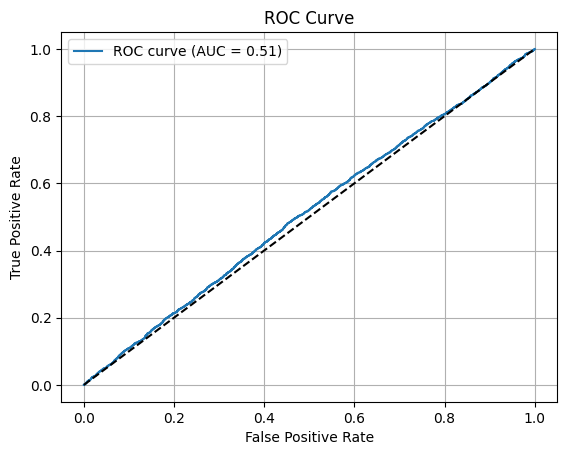

In [ ]:
# STEP 9: ROC Curve
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# STEP 10: Cross-Validation
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [0.5327 0.5332 0.5279 0.5316 0.5331]
Mean CV Accuracy: 0.5317000000000001
